### Peny Lane

https://docs.pennylane.ai/projects/qiskit/en/stable/

El complemento PennyLane-Qiskit integra el marco de computación cuántica Qiskit con las capacidades de aprendizaje automático cuántico de PennyLane.

PennyLane es una biblioteca de Python multiplataforma para el aprendizaje automático cuántico, la diferenciación automática y la optimización de cálculos híbridos cuántico-clásicos.

Qiskit es un marco de código abierto para la computación cuántica.

Una vez instalado el complemento PennyLane-Qiskit, se puede acceder a los dispositivos Qiskit directamente en PennyLane, sin la necesidad de importar nuevos paquetes.

https://pypi.org/project/pennylane/

https://pennylane.ai/

https://www.youtube.com/watch?v=lTxJKvcZu7E

### **IMPORTANTE** 

Penny Lane es otro entorno que aporta cosas distintas que no tiene Qiskit. 

Abajo veremos funciones de simplificación de circuitos que son muy interesantes. 

La función principal de Penny Lane es integrar la computación cuántica con la clásica. 

Sí, la afirmación es correcta: la diferencia principal es que PennyLane está diseñado para integrar la computación cuántica con la clásica, mientras que Qiskit es un kit de desarrollo de software (SDK) para la construcción y ejecución de aplicaciones cuánticas. PennyLane se enfoca en la computación híbrida cuántico-clásica, permitiendo la ejecución de algoritmos que requieren tanto la computación clásica como la cuántica. 
Qiskit 

Es un SDK de código abierto para trabajar con computación cuántica.
Permite construir y ejecutar circuitos cuánticos en simuladores y hardware cuántico.
Es una herramienta para programar directamente en el ámbito cuántico.

PennyLane 
Es una librería de Python que se enfoca en la computación cuántico-clásica híbrida.
Integra hardware cuántico con técnicas de aprendizaje automático clásico.
Permite el diseño y la ejecución de algoritmos que combinan ambos mundos.

En resumen, si necesitas una herramienta para construir y ejecutar algoritmos cuánticos en general, Qiskit es una excelente opción. Sin embargo, si tu objetivo es trabajar con algoritmos cuánticos-clásicos híbridos que requieren la integración de ambos tipos de cómputo, PennyLane es la herramienta más adecuada. 




Mirar estos otros ejemplos de Ket.G

https://www.youtube.com/watch?v=XB8mg8cdEJM&t=507s

https://www.youtube.com/watch?v=lTxJKvcZu7E&t=1144s


In [ ]:
! pip install pennylane --upgrade
! pip install pennylane-qiskit --upgrade

""" 
! pip install pennylane-lightning --upgrade
! pip install pennylane-forest --upgrade
! pip install pennylane-qsharp --upgrade
! pip install pennylane-lightning-gpu --upgrade
! pip install pennylane-quantinuum --upgrade
! pip install pennylane-azure-quantum --upgrade
! pip install pennylane-ibm --upgrade
! pip install pennylane-aws-braket --upgrade
! pip install pennylane-cirq --upgrade

"""

In [3]:
import pennylane as qml
from pennylane import numpy as np   
import matplotlib.pyplot as plt

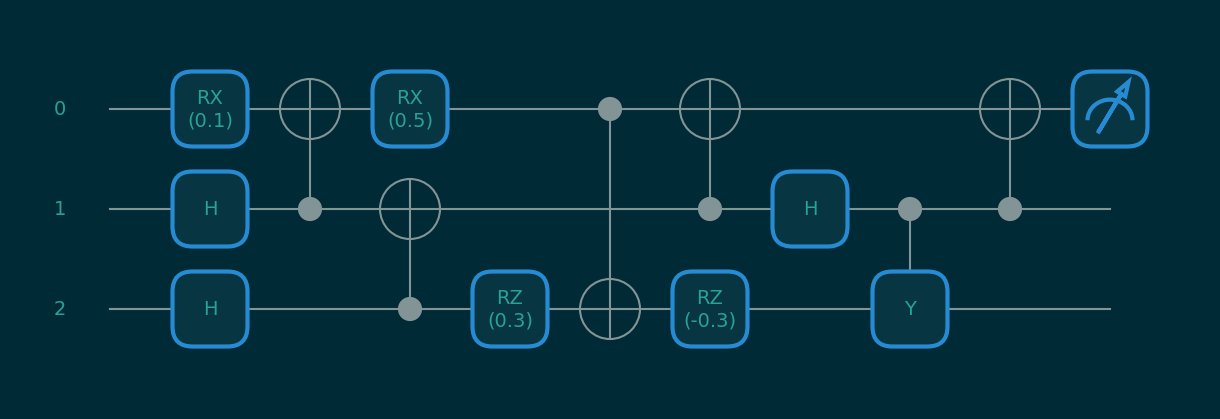

In [5]:
# número de qubits 
n_wires = 3

# Creamos el device del circuito cuántico, el device es una entidad
# de pennyLane que representa un dispositivo cuántico a su modo para interactuar con él
# nombre del device: default.qubit, número de qubits: wires=n_wires, número de shots: shots=1
dev = qml.device("default.qubit", wires=n_wires, shots=1) 

# función para aplicar las puertas cuánticas al circuito
def circuit(angles):
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    qml.Hadamard(wires=2) # qubit 2
    
    # RX
    qml.RX(angles[0], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    qml.CNOT(wires=[2, 1]) # qubit 2 control y qubit 1 objetivo 
    
    # RX
    qml.RX(angles[2], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # RZ
    qml.RZ(angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z
    
    # CNOT
    qml.CNOT(wires=[0, 2]) # qubit 0 control y qubit 2 objetivo
    
    # RZ
    qml.RZ(-angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z negativo
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    
    # CY
    qml.CY(wires=[1, 2]) # qubit 1 control y qubit 2 objetivo aplicando una rotación en el eje y 
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # expval es una 
    return qml.expval(qml.PauliZ(wires=0)) # medir el qubit 0 en la base Z

# Ángulos de entrada al circuito
angles =[0.1, 0.3, 0.5] # valores de los ángulos de rotación en radianes

# Aplicamos la función al circuito mediante Qnode
qnode= qml.QNode(circuit, dev)# QNode es una clase de PennyLane que representa un circuito cuántico
# que se puede ejecutar en un dispositivo cuántico o simulado
# Ejecutamos el circuito con los ángulos de entrada
# le pasamos el objeto qnode a la función draw_mpl para dibujar el circuito
# decimals=1 es el número de decimales que se muestran en los ángulos
# style="solarized_dark" es el estilo de la visualización del circuito
# angles es la lista de ángulos de rotación que se pasan al circuito
qml.draw_mpl(qnode,decimals=1, style="solarized_dark")(angles)
    
plt.show() # mostramos el circuito

### Otra forma más compacta de hacerlo

In [1]:
import pennylane as qml
from pennylane import numpy as np   
import matplotlib.pyplot as plt

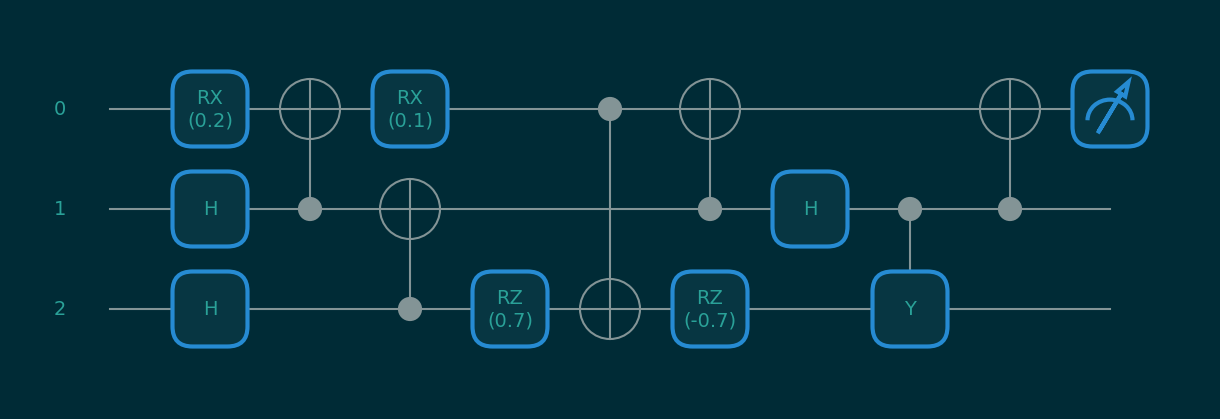

In [17]:
# número de qubits 
n_wires = 3

# Creamos el device del circuito cuántico, el device es una entidad que representa un dispositivo cuántico a su modo 
# para interactuar con él
dev = qml.device("default.qubit", wires=n_wires, shots=1)

# a esto lo llamamos decorator, que representa un dispositivo cuántico a su modo para interactuar con él
@qml.qnode(dev)

# función para aplicar las puertas cuánticas al circuito
def circuit(angles):
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    qml.Hadamard(wires=2) # qubit 2
    
    # RX
    qml.RX(angles[0], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    qml.CNOT(wires=[2, 1]) # qubit 2 control y qubit 1 objetivo 
    
    # RX
    qml.RX(angles[2], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # RZ
    qml.RZ(angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z
    
    # CNOT
    qml.CNOT(wires=[0, 2]) # qubit 0 control y qubit 2 objetivo
    
    # RZ
    qml.RZ(-angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z negativo
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    
    # CY
    qml.CY(wires=[1, 2]) # qubit 1 control y qubit 2 objetivo aplicando una rotación en el eje y 
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # expval es una 
    return qml.expval(qml.PauliZ(wires=0)) # medir el qubit 0 en la base Z

# Ángulos de entrada al circuito
angles =[0.2, 0.7, 0.1] # valores de los ángulos de rotación en radianes

# le pasamos el objeto circuit a la función draw_mpl para dibujar el circuito
qml.draw_mpl(circuit,decimals=1, style="solarized_dark")(angles) 
    
plt.show() # mostramos el circuito

### Probemos a juntar todas las puertas de único qubit a la derecha

quitamos el decorador


In [1]:
import pennylane as qml
from pennylane import numpy as np   
import matplotlib.pyplot as plt

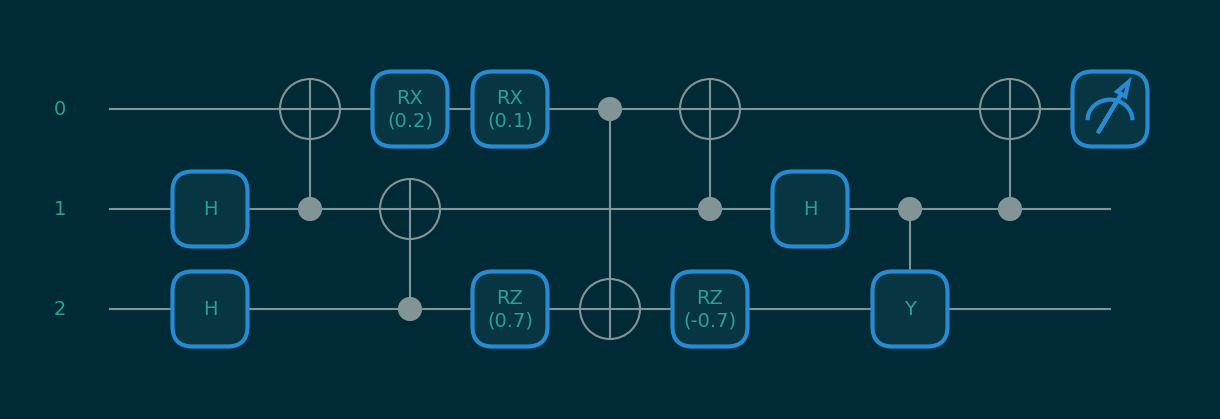

In [5]:
# número de qubits 
n_wires = 3

# Creamos el device del circuito cuántico, el device es una entidad que representa un dispositivo cuántico a su modo 
# para interactuar con él
#dev = qml.device("default.qubit", wires=n_wires, shots=1)

# a esto lo llamamos decorator, que representa un dispositivo cuántico a su modo para interactuar con él
#@qml.qnode(dev)

# función para aplicar las puertas cuánticas al circuito
def circuit(angles):
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    qml.Hadamard(wires=2) # qubit 2
    
    # RX
    qml.RX(angles[0], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    qml.CNOT(wires=[2, 1]) # qubit 2 control y qubit 1 objetivo 
    
    # RX
    qml.RX(angles[2], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # RZ
    qml.RZ(angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z
    
    # CNOT
    qml.CNOT(wires=[0, 2]) # qubit 0 control y qubit 2 objetivo
    
    # RZ
    qml.RZ(-angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z negativo
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    
    # CY
    qml.CY(wires=[1, 2]) # qubit 1 control y qubit 2 objetivo aplicando una rotación en el eje y 
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # expval es una 
    return qml.expval(qml.PauliZ(wires=0)) # medir el qubit 0 en la base Z

# Ángulos de entrada al circuito
angles =[0.2, 0.7, 0.1] # valores de los ángulos de rotación en radianes

# Aplicamos la función al circuito mediante Qnode
# quitamos el decorador que está comentado arriba
qnode = qml.QNode(circuit, dev)

# aplicamos la función commute_controlled para juntar todas las puertas de único qubit a la derecha
# y lo guardamos en la variable commuted_qnode, actua sobre todas las puertas de uníco qubit
commuted_qnode = qml.transforms.commute_controlled(qnode, direction="right")

# le pasamos el objeto commuted_qnode a la función draw_mpl para dibujar el circuito
qml.draw_mpl(commuted_qnode, decimals=1, style="solarized_dark")(angles) 

plt.show() # mostramos el circuito

**No funciona, solo une dos puertas RX**

Aparecen errores de funciones  deprecated. 

En el ejemplo siguiente habla de una función para cancelar inversas o simplificarlas

lo intenta hacer con qml.transforms.cancel_inverses, pero no funciona

También se pueden juntar las rotaciones seguidas en una sola usando qml.transforms.merge_rotations

Tiene otra forma de hacerlo mediante la colocación adecuada en orden de las puertas. 

Finalmente podemos hacer todo esto con un compile

In [ ]:
import pennylane as qml
from pennylane import numpy as np   
import matplotlib.pyplot as plt

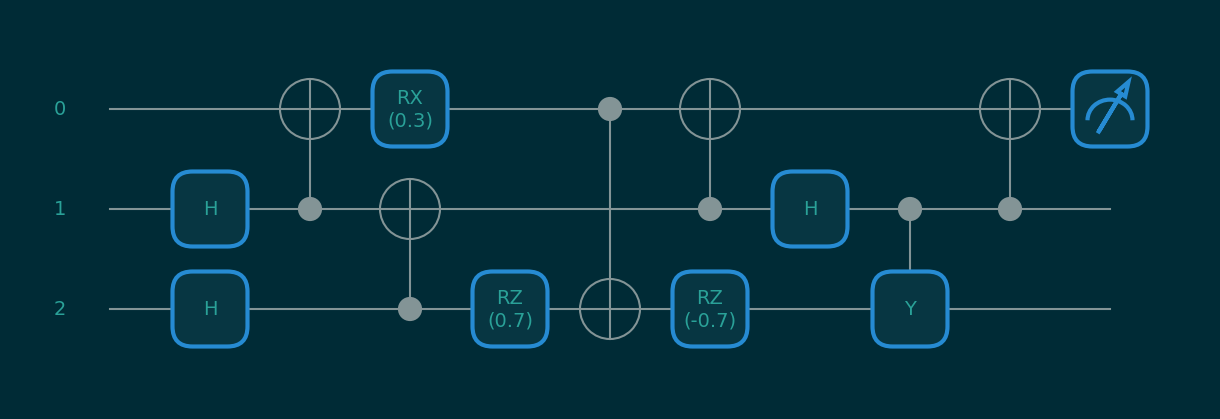

In [15]:
# número de qubits 
n_wires = 3

# Creamos el device del circuito cuántico, el device es una entidad que representa un dispositivo cuántico a su modo 
# para interactuar con él
dev = qml.device("default.qubit", wires=n_wires, shots=1)

# a esto lo llamamos decorator, que representa un dispositivo cuántico a su modo para interactuar con él
#@qml.qnode(dev)

# función para aplicar las puertas cuánticas al circuito
def circuit(angles):
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    qml.Hadamard(wires=2) # qubit 2
    
    # RX
    qml.RX(angles[0], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    qml.CNOT(wires=[2, 1]) # qubit 2 control y qubit 1 objetivo 
    
    # RX
    qml.RX(angles[2], wires=0) # ángulo de rotación para el qubit 0 en el eje x
    
    # RZ
    qml.RZ(angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z
    
    # CNOT
    qml.CNOT(wires=[0, 2]) # qubit 0 control y qubit 2 objetivo
    
    # RZ
    qml.RZ(-angles[1], wires=2) # ángulo de rotación para el qubit 2 en el eje z negativo
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # Hadamard
    qml.Hadamard(wires=1) # qubit 1
    
    # CY
    qml.CY(wires=[1, 2]) # qubit 1 control y qubit 2 objetivo aplicando una rotación en el eje y 
    
    # CNOT
    qml.CNOT(wires=[1, 0]) # qubit 1 control y qubit 0 objetivo
    
    # expval es una 
    return qml.expval(qml.PauliZ(wires=0)) # medir el qubit 0 en la base Z

# Crear el QNode
qnode = qml.QNode(circuit, dev)

# Usar la transformación commute_controlled para mover puertas de un solo qubit a la derecha
commuted_qnode = qml.transforms.commute_controlled(qnode, direction="right")

# Compilar el QNode transformado
compiled_qnode = qml.compile(commuted_qnode)

# Dibujar el circuito compilado
fig = qml.draw_mpl(compiled_qnode, decimals=1, style="solarized_dark")(angles)
plt.show()

### En resumen nos muestran distintas opciones de simplificar el circuito. 

Pero no funciona porque la versión que utiliza está deprecada. 